# **Sentiment Classification of Movie Review Phrases Using NLP Techniques**

Neysha L. Pagán Vargas

IST 664 - Natural Language Processing

Dr. Preeti Mahaveer Jagadev

June 10, 2025

## Project Description

This notebook presents a sentiment analysis project using the Kaggle dataset of movie review phrases, originally derived from Rotten Tomatoes and annotated via crowd-sourcing. The dataset is labeled with five sentiment classes:

- **0**: Negative  
- **1**: Somewhat Negative  
- **2**: Neutral  
- **3**: Somewhat Positive  
- **4**: Positive  

The file `train.tsv` contains over 156,000 phrases (sub-sentences) extracted from full reviews. The goal is to build a classifier capable of predicting the correct sentiment label for a given phrase.


## Project Files Overview

Below is a brief explanation of the files and scripts included in the Kaggle Sentiment Analysis on Movie Reviews project:

### Dataset Files
- **train.tsv**: Contains 156,060 labeled phrases with sentiment classes from 0 (negative) to 4 (positive).
- **test.tsv**: Contains phrases without sentiment labels, used for prediction.

### Lexicons and Dictionaries
- **liwccat2007**: LIWC category file that defines sentiment-related and psychological word categories.
- **liwc2007.dic**: LIWC dictionary mapping words to specific emotional or cognitive categories like positive emotion, anger, or anxiety.
- **subjclueslen1-HLTEMNLP05.tff**: Subjectivity Lexicon used to identify subjective terms and their polarity (positive, negative, neutral), along with strength (strong/weak subjectivity).

### Python Scripts
- **classifyKaggle.py**: Main script to train and evaluate a sentiment classifier using features such as TF-IDF.
- **classifyKaggle.crossval.py**: Extended version that includes cross-validation logic (e.g., K-fold) for better evaluation.
- **sentiment_read_LIWC_pos_neg_words.py**: Script to parse LIWC dictionary files and extract counts of positive and negative words for each phrase.
- **sentiment_read_subjectivity.py**: Script to use the subjectivity lexicon and compute subjective word counts and polarity features.

These resources allow us to test both machine learning models and lexicon-based methods for sentiment analysis, and even combine both approaches into a hybrid system.


## Exploratory Data Analysis and Preprocessing

In [1]:
# Improt requierd libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Load the dataset

df = pd.read_csv("train.tsv", sep="\t")
df.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
# Check dataset structure

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nUnique sentiment classes:", sorted(df['Sentiment'].unique()))
df['Sentiment'].value_counts(normalize=True).sort_index()


Shape: (156060, 4)

Columns: ['PhraseId', 'SentenceId', 'Phrase', 'Sentiment']

Unique sentiment classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


,proportion
Sentiment,
0,0.045316
1,0.174760
2,0.509945
3,0.210989
4,0.058990


The output confirms that the dataset contains 156,060 phrases across 4 columns, lists those columns (PhraseId, SentenceId, Phrase, Sentiment), identifies the five unique sentiment classes (0–4), and shows the proportion of the dataset that each sentiment class represents.

The five sentiment classes are:

0 = Negative

1 = Somewhat Negative

2 = Neutral

3 = Somewhat Positive

4 = Positive

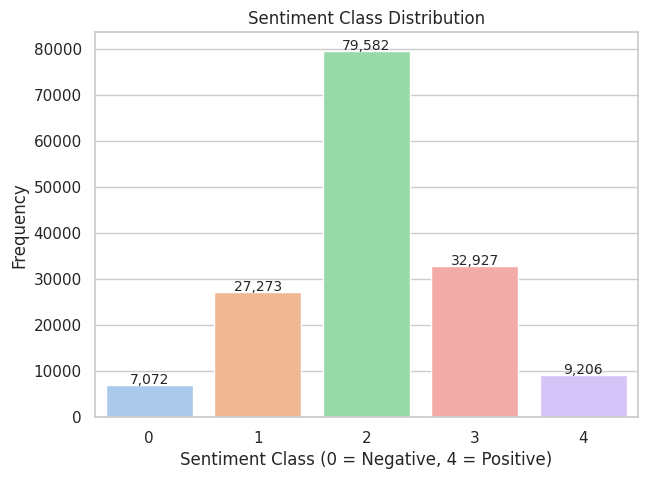

In [5]:
# Viisualize Sentiment Class Distribution

plt.figure(figsize=(7,5))
ax = sns.countplot(x='Sentiment', data=df, palette="pastel")

# Add value labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 200,
            '{:,.0f}'.format(height),
            ha="center", fontsize=10)

plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment Class (0 = Negative, 4 = Positive)")
plt.ylabel("Frequency")
plt.xticks([0, 1, 2, 3, 4])
plt.show()


In [7]:
# Split the data

X = df["Phrase"]
y = df["Sentiment"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


We split the dataset into `Phrase` (features) and `Sentiment` (labels) to prepare the input and target variables for supervised machine learning.

## Feature Engineering & Modeling

### TF-IDF Vectorization

TF-IDF (Term Frequency–Inverse Document Frequency) is a numerical representation of text that highlights words that are important within a phrase but not common across all phrases. It transforms raw text into a feature matrix suitable for machine learning by capturing the relevance of words or n-grams (e.g., unigrams and bigrams) while downweighting frequently occurring but uninformative words (like "the" or "is").


In [8]:
# TF-IDF Vectorization

# Convert text phrases into TF-IDF feature vectors
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)


### Logistic Regression Model

Logistic Regression is a linear classification algorithm that models the probability of a data point belonging to each class. In this multi-class setting, it uses a softmax function to assign probabilities across all five sentiment labels and learns optimal weights to separate them based on the TF-IDF features.

In [9]:
# Logistic Regression Model Training

# Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=200)

The parameter `max_iter=200` specifies the maximum number of iterations the optimizer is allowed during training. It ensures the model has enough cycles to converge without raising a warning if the default (100) is insufficient.



## Evaluation and Results

The following evaluates the logistic regression model on the validation set across the five sentiment classes (0 to 4)

In [10]:
# Predict sentiment labels on the validation set
y_pred = model.predict(X_val_tfidf)

# Print classification report
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_val, y_pred, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.5594    0.1931    0.2871      1414
           1     0.5266    0.3465    0.4180      5455
           2     0.6704    0.8748    0.7591     15917
           3     0.5555    0.4759    0.5126      6585
           4     0.6091    0.2395    0.3439      1841

    accuracy                         0.6300     31212
   macro avg     0.5842    0.4260    0.4641     31212
weighted avg     0.6124    0.6300    0.6016     31212



### Metric Definitions:
- Precision = TP / (TP + FP): How many predicted labels were correct
- Recall = TP / (TP + FN): How many actual labels were correctly predicted
- F1-Score = Harmonic mean of precision and recall
- Support = Number of actual samples of that class in the validation set


### Key Observations:
- Class 2 (Neutral) is the best-performing class with F1 = 0.7591, which makes sense since it has the most examples (support = 15,917).

- Class 0 (Negative) has poor recall (0.1931), meaning the model fails to correctly identify many true negative phrases.

- Class 4 (Positive) also struggles with recall (0.2395), likely due to class imbalance.

- Class 1 (Somewhat Negative) has very high recall (0.9465), but at the expense of low precision (0.5266), which indicates many false positives.


This suggests the model tends to overpredict class 1 and underpredicts classes 0 and 4, which could be improved with:

- Class weighting or resampling
- Lexicon-based features
- More balanced training data


### Model Scores
- Accuracy 63.0%
- Macro F1 Avg 46%
- Weighted Avg 60%

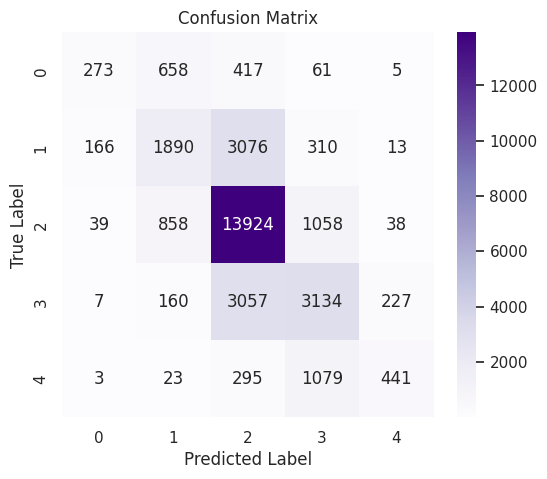

In [11]:
# Confusion Matrix Visualization

# Plot confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=[0, 1, 2, 3, 4],
            yticklabels=[0, 1, 2, 3, 4])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


The confusion matrix compares the true labels (rows) to the predicted labels (columns). Each cell [i, j] shows how many times class i was predicted as class j.

The confusion matrix reveals that the model performs best on class 2 (Neutral), correctly predicting 13,924 cases, followed by class 3 (Somewhat Positive) and class 1 (Somewhat Negative). However, it struggles significantly with class 0 (Negative) and class 4 (Positive), which have the fewest correct predictions. Many phrases from somewhat negative and somewhat positive classes are misclassified as neutral, indicating the model’s tendency to default to the majority class. This behavior is largely due to class imbalance, subtle or ambiguous phrase-level sentiment, and the limitations of logistic regression with TF-IDF in capturing fine-grained emotional nuances.

## Load Subjectivity Lexicon into a Dictionary


In [12]:
# Load MPQA Subjectivity Lexicon
def load_subjectivity_lexicon(filepath):
    lexicon = {}
    with open(filepath, 'r') as file:
        for line in file:
            parts = line.strip().split()
            word = parts[2].split('=')[1]
            polarity = parts[-1].split('=')[1]
            strength = parts[0].split('=')[1]
            lexicon[word] = {
                'polarity': polarity,
                'strength': strength
            }
    return lexicon

subjectivity_lexicon = load_subjectivity_lexicon("subjclueslen1-HLTEMNLP05.tff")

We load the MPQA Subjectivity Lexicon, which contains annotated words with sentiment polarity (positive, negative, neutral) and subjectivity strength (strong or weak). This lexicon will help us identify emotionally charged or opinionated words in each phrase.


In [13]:
# Extract Lexicon-Based Features
import re

def extract_lexicon_features(phrase, lexicon):
    words = re.findall(r'\b\w+\b', phrase.lower())
    strong, weak, pos, neg = 0, 0, 0, 0

    for word in words:
        if word in lexicon:
            if lexicon[word]['strength'] == 'strongsubj':
                strong += 1
            elif lexicon[word]['strength'] == 'weaksubj':
                weak += 1

            if lexicon[word]['polarity'] == 'positive':
                pos += 1
            elif lexicon[word]['polarity'] == 'negative':
                neg += 1

    return [strong, weak, pos, neg]

# Apply to train and validation sets
X_train_lex = np.array([extract_lexicon_features(p, subjectivity_lexicon) for p in X_train])
X_val_lex = np.array([extract_lexicon_features(p, subjectivity_lexicon) for p in X_val])


For each phrase, we count how many words appear in the lexicon and track four features:
- Number of strong subjective words
- Number of weak subjective words
- Number of positive words
- Number of negative words

These counts will be used as additional features to enhance the model's understanding of sentiment beyond TF-IDF alone.


### Combining TF-IDF and Lexicon-Based Features

We combine the sparse TF-IDF feature matrix with the dense lexicon-based features to create a single, enriched input representation. This hybrid approach allows the model to benefit from both statistical patterns in the text (TF-IDF) and predefined sentiment cues (subjective word counts) to improve classification performance.


In [15]:
from scipy.sparse import hstack

# Combine sparse TF-IDF matrix with dense lexicon features
X_train_combined = hstack([X_train_tfidf, X_train_lex])
X_val_combined = hstack([X_val_tfidf, X_val_lex])


# Retrain logistic regression with combined features
model_combined = LogisticRegression(max_iter=200)
model_combined.fit(X_train_combined, y_train)

# Evaluate
y_pred_combined = model_combined.predict(X_val_combined)
print("Classification Report (TF-IDF + Lexicon):")
print(classification_report(y_val, y_pred_combined, digits=4))


Classification Report (TF-IDF + Lexicon):
              precision    recall  f1-score   support

           0     0.5451    0.2008    0.2935      1414
           1     0.5266    0.3533    0.4229      5455
           2     0.6770    0.8740    0.7630     15917
           3     0.5496    0.4729    0.5084      6585
           4     0.5767    0.2553    0.3539      1841

    accuracy                         0.6314     31212
   macro avg     0.5750    0.4313    0.4683     31212
weighted avg     0.6119    0.6314    0.6044     31212



This report shows the performance of the enhanced model that combines TF-IDF features with lexicon-based features from the MPQA subjectivity dictionary.

The overall accuracy is now 63.14% and the macro average F1-score improved to 0.4683 from 0.4641.

The hybrid model slightly improves overall performance, especially for class 4 (Positive), whose F1-score rose from 0.3439 to 0.3539.

The improvement is modest but consistent, showing that lexicon-based features provide complementary information to TF-IDF.

## Conclusion and Future Work

This project explored sentiment classification using logistic regression and TF-IDF features on the Kaggle movie review phrase dataset. The model achieved a baseline accuracy of 63%, performing best on the majority class (Neutral) but struggling with minority classes like Negative and Positive.

To enhance performance, we integrated lexicon-based features from the MPQA Subjectivity Lexicon. This hybrid model showed a slight but consistent improvement in overall accuracy and macro-average F1 score. The lexicon-based features helped capture additional sentiment cues, especially for edge classes.

### Key Takeaways:
- TF-IDF is an effective baseline representation for phrase-level sentiment.
- Logistic regression provides interpretable and fast results for multi-class text classification.
- Combining handcrafted sentiment features (like strong/weak polarity counts) with machine-learned ones adds value.
- Challenges like class imbalance and ambiguous phrases persist and require more advanced techniques.

### Future Work:
- Apply more expressive models like LSTM or BERT to capture semantic nuance.
- Implement class balancing strategies (oversampling, SMOTE, or class weights).
- Explore full pipeline tuning via grid search and model ensembling.
- Expand lexicon integration to include LIWC or domain-specific dictionaries.

> **Note:** This project used a standard train-test split for evaluation. However, implementing **k-fold cross-validation** (e.g., StratifiedKFold) is highly recommended for more robust model validation. Cross-validation reduces bias from a single split and offers a better estimate of real-world model performance—especially in class-imbalanced datasets.
